In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Hackathon_Working_Data.csv')
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [ ]:
df.shape

(26985, 14)

In [ ]:
df.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


In [ ]:
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [ ]:
unique_counts=df.nunique()
print(unique_counts)

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64


In [ ]:
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


CORRELATION HEATMAP

<ipython-input-5-6c095017ad41>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


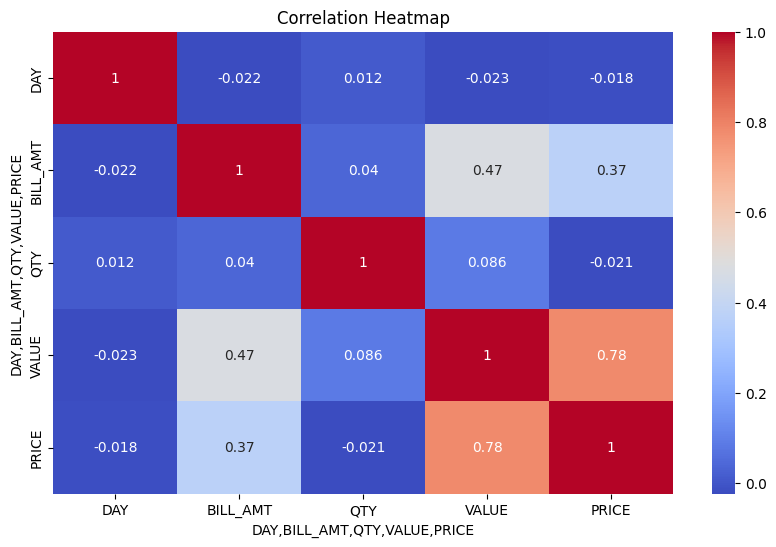

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation,
                     annot=True,vmax=1,
                     cmap='coolwarm')

plt.xlabel('DAY,BILL_AMT,QTY,VALUE,PRICE')
plt.ylabel('DAY,BILL_AMT,QTY,VALUE,PRICE')
plt.title('Correlation Heatmap')
plt.show()

DAY WISE BILL AMOUNT ANALYSIS

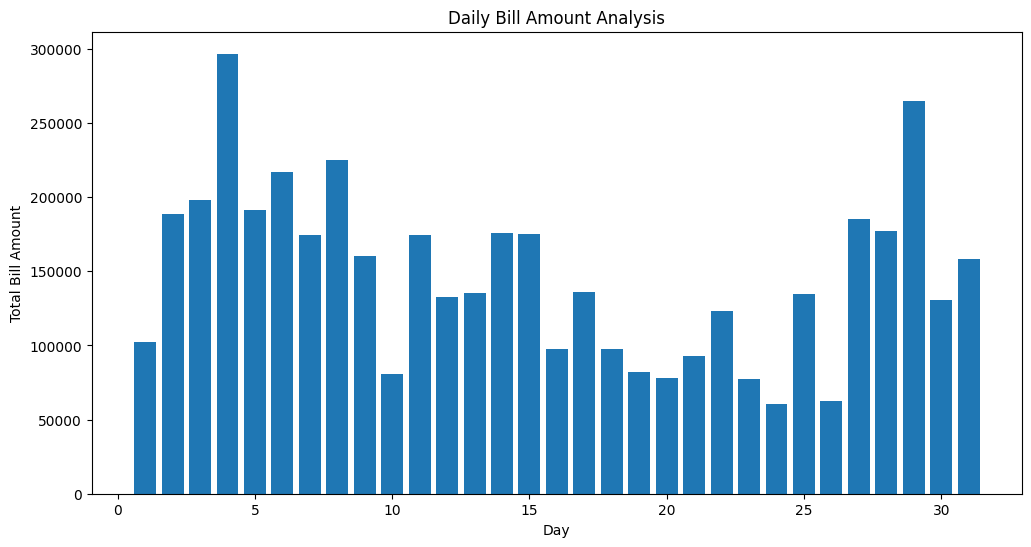

In [ ]:
total_bills = df.groupby("DAY")["BILL_AMT"].sum()

plt.figure(figsize=(12, 6))
plt.bar(total_bills.index, total_bills.values)
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Daily Bill Amount Analysis")
plt.xticks(rotation=0)
plt.show()


In [ ]:
MONTHLY SALES TREAND

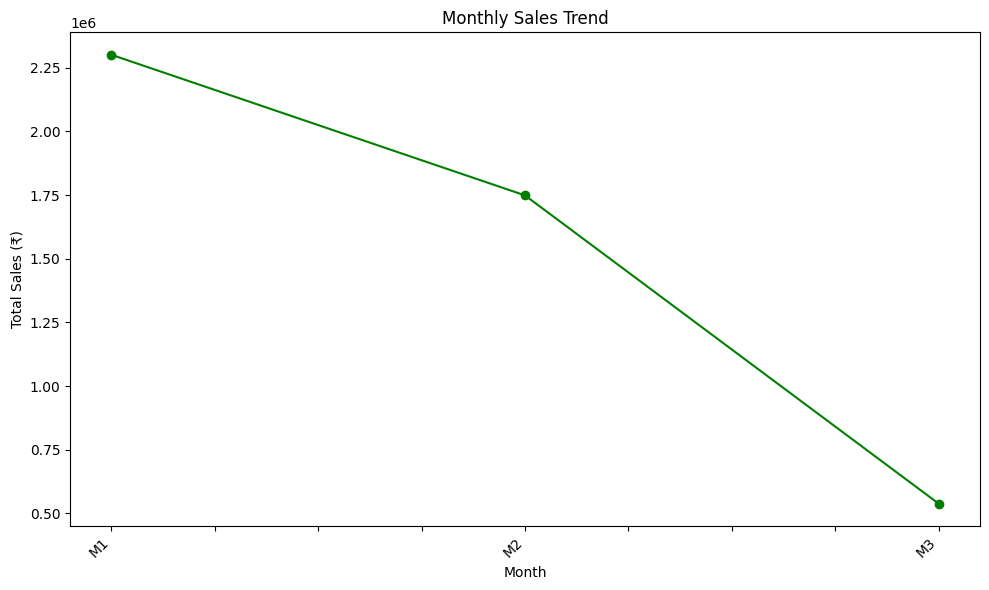

In [ ]:
total_sales_per_month = df.groupby('MONTH')['BILL_AMT'].sum()
plt.figure(figsize=(10, 6))
total_sales_per_month.plot(kind='line', marker='o', color='g')
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TOP GROUP PRODUCTS TRENDS

<ipython-input-56-ad7fd553ad25>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_products_by_group = (df.groupby(['GRP', 'MBRD'])['QTY','VALUE']


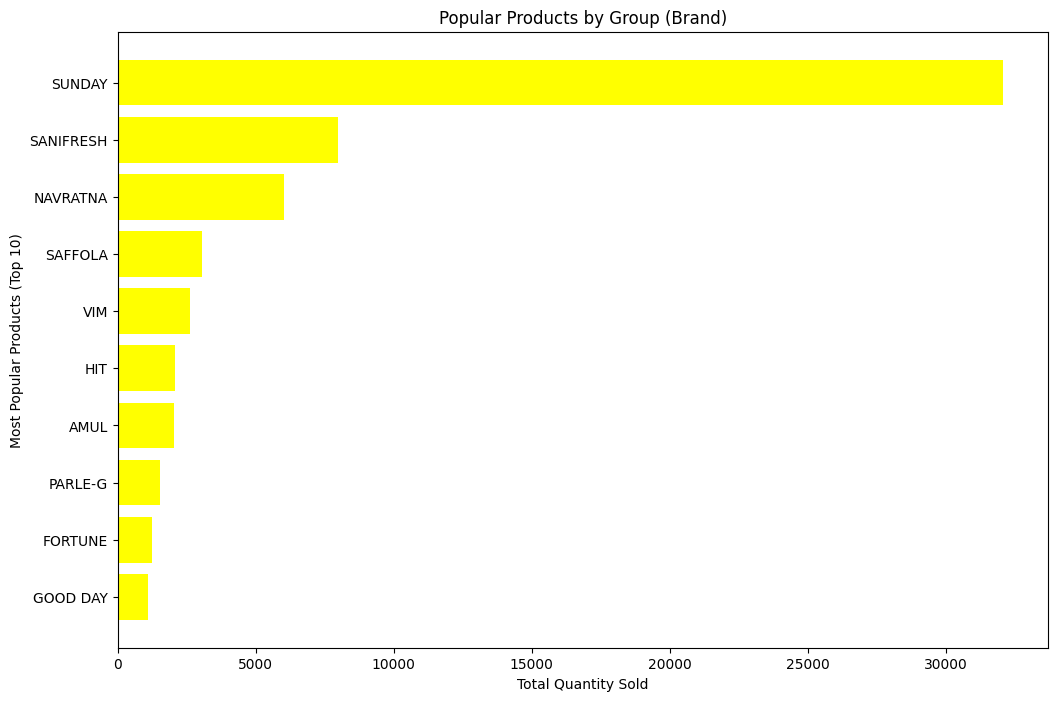

In [ ]:
top_products_by_group = (df.groupby(['GRP', 'MBRD'])['QTY','VALUE']
                         .sum()
                         .reset_index()
                         .sort_values(by='QTY', ascending=False)
                         .head(10)
)
plt.figure(figsize=(12, 8))
plt.barh(top_products_by_group['MBRD'], top_products_by_group['QTY'], color='yellow')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Most Popular Products (Top 10)")
plt.title("Popular Products by Group (Brand)")
plt.gca().invert_yaxis()
plt.show()

STORE SALES ANALYSIS

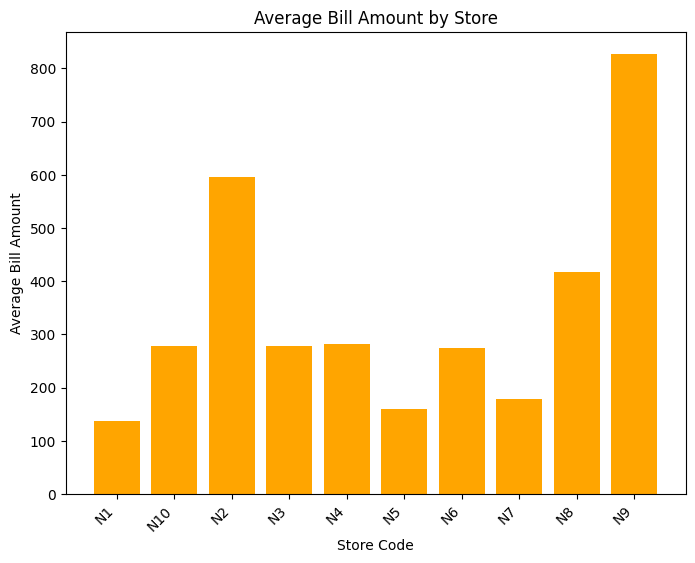

In [ ]:
average_bill_per_store = df.groupby("STORECODE")["BILL_AMT"].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_bill_per_store.index, average_bill_per_store.values,color='orange')
plt.xlabel("Store Code")
plt.ylabel("Average Bill Amount")
plt.title("Average Bill Amount by Store")
plt.xticks(rotation=45, ha='right')
plt.show()

TOP 3 STORES

In [ ]:
total_revenue_per_store = df.groupby("STORECODE")["BILL_AMT"].sum()
top_3_stores = total_revenue_per_store.sort_values(ascending=False).head(3)
print("Top 3 Stores by Total Revenue:")
for store_code, revenue in top_3_stores.items():
    print(f"- Store Code: {store_code}, Total Revenue: ₹{revenue:.2f}")

Top 3 Stores by Total Revenue:
- Store Code: N2, Total Revenue: ₹794062.00
- Store Code: N7, Total Revenue: ₹763792.27
- Store Code: N1, Total Revenue: ₹626464.78


TOP GRP, SGRP, MBRD, BRD SALES

In [ ]:
top_selling_grp = df.groupby('GRP')['QTY'].sum().sort_values(ascending=False).head(1)
top_grp_code = top_selling_grp.index[0]
top_selling_sgrp = df[df['GRP'] == top_grp_code].groupby('SGRP')['QTY'].sum().sort_values(ascending=False).head(1)
top_selling_mbrd = df.groupby('MBRD')['QTY'].sum().sort_values(ascending=False).head(1)
top_selling_brd = df.groupby('BRD')['QTY'].sum().sort_values(ascending=False).head(1)
print("Top Selling:")
print(f"- Group (GRP):                     {top_selling_grp.index[0]} -     Total Quantity Sold: {top_selling_grp.values[0]:.0f}")
print(f"- Subgroup (SGRP) within Group:    {top_selling_sgrp.index[0]} -    Total Quantity Sold: {top_selling_sgrp.values[0]:.0f}")
print(f"- Company (CMP):                   {top_selling_cmp.index[0]} -     Total Quantity Sold: {top_selling_cmp.values[0]:.0f}")
print(f"- Brand (MBRD):                    {top_selling_mbrd.index[0]} -    Total Quantity Sold: {top_selling_mbrd.values[0]:.0f}")
print(f"- Brand (BRD):                     {top_selling_brd.index[0]} -     Total Quantity Sold: {top_selling_brd.values[0]:.0f}")

Top Selling:
- Group (GRP):                     REFINED EDIBLE OILS-ALL PACKS -     Total Quantity Sold: 39067
- Subgroup (SGRP) within Group:    SUN FLOWER -    Total Quantity Sold: 32803
- Company (CMP):                   LIBERTY OIL MILLS -     Total Quantity Sold: 32102
- Brand (MBRD):                    SUNDAY -    Total Quantity Sold: 32164
- Brand (BRD):                     SUNDAY -     Total Quantity Sold: 32164


In [ ]:
TOP STORES

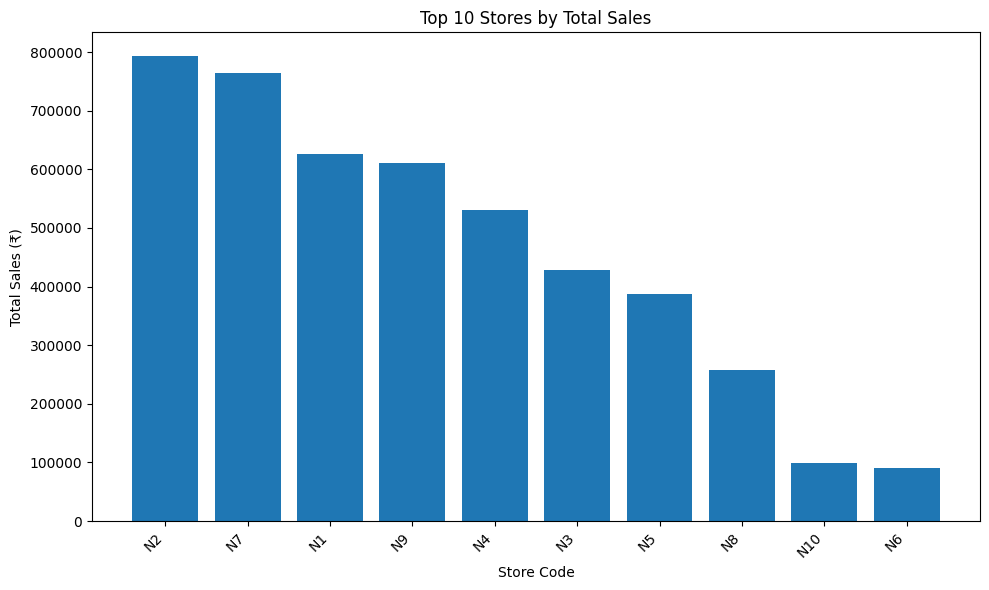

Top 10 Stores by Total Sales:
- Store Code: N2, Total Sales: ₹794062.00
- Store Code: N7, Total Sales: ₹763792.27
- Store Code: N1, Total Sales: ₹626464.78
- Store Code: N9, Total Sales: ₹610348.02
- Store Code: N4, Total Sales: ₹530274.81
- Store Code: N3, Total Sales: ₹428898.37
- Store Code: N5, Total Sales: ₹387991.00
- Store Code: N8, Total Sales: ₹257089.13
- Store Code: N10, Total Sales: ₹99128.00
- Store Code: N6, Total Sales: ₹90474.00


In [ ]:
total_sales_per_store = df.groupby("STORECODE")["BILL_AMT"].sum()
top_10_stores = total_sales_per_store.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_stores.index, top_10_stores.values)
plt.xlabel("Store Code")
plt.ylabel("Total Sales (₹)")
plt.title("Top 10 Stores by Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Top 10 Stores by Total Sales:")
for store_code, sales in top_10_stores.items():
    print(f"- Store Code: {store_code}, Total Sales: ₹{sales:.2f}")

TOP COMPANIES

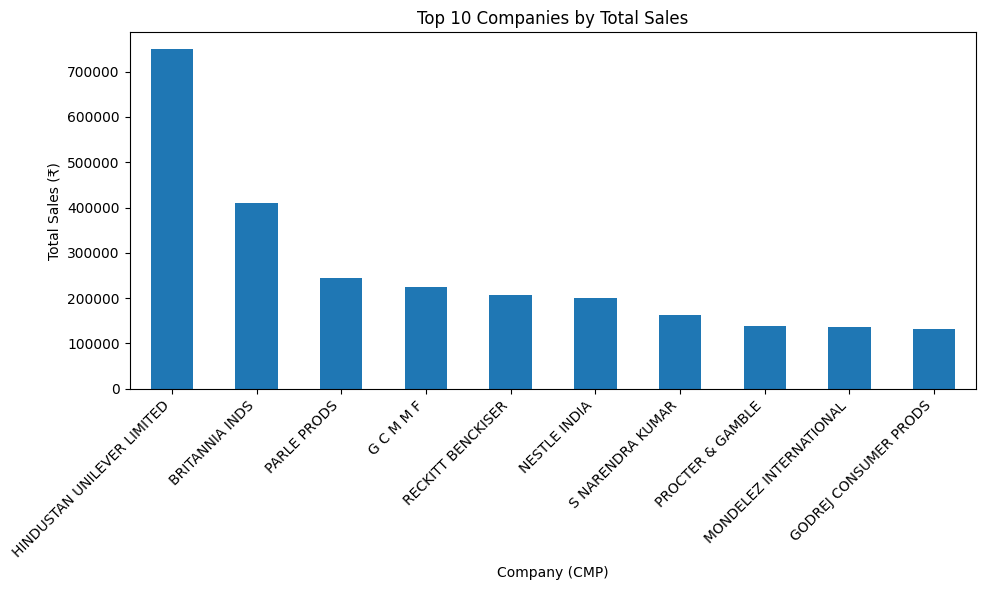

In [ ]:
total_sales_per_company = df.groupby('CMP')['BILL_AMT'].sum()
top_10_companies = total_sales_per_company.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', colormap='tab20')
plt.xlabel("Company (CMP)")
plt.ylabel("Total Sales (₹)")
plt.title("Top 10 Companies by Total Sales")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

COMPANY SALES IN EACH STORE

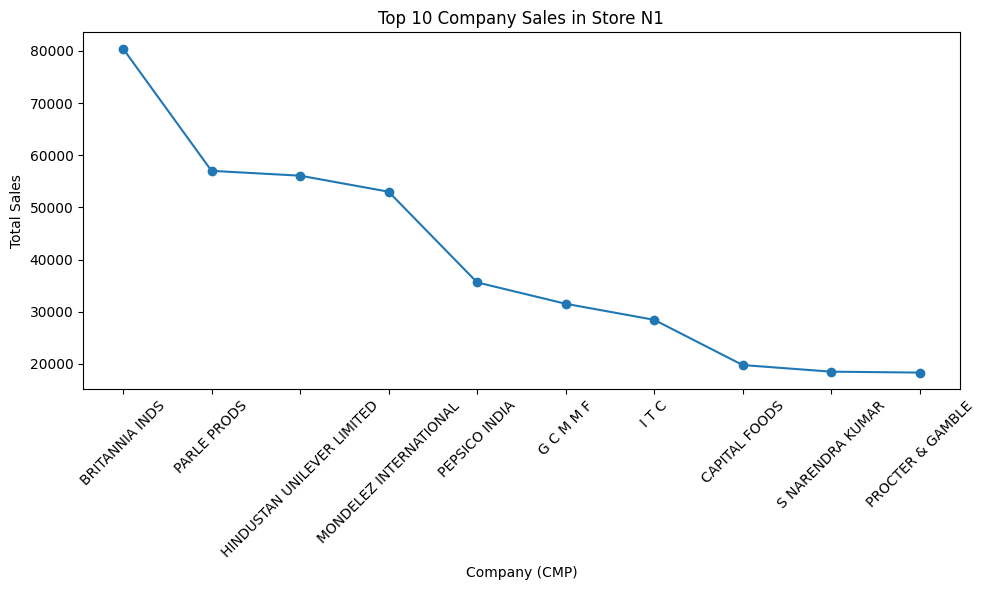

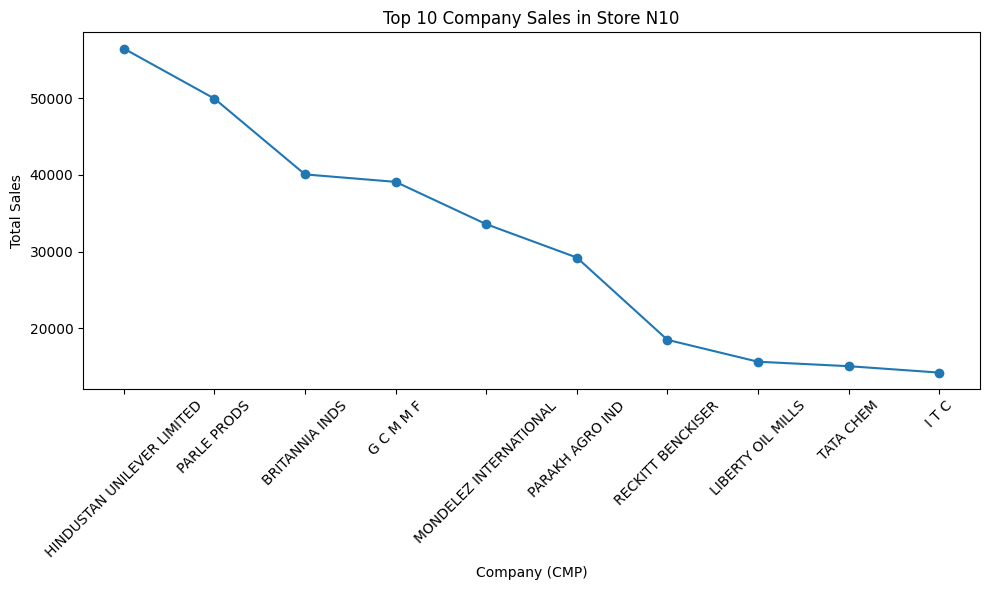

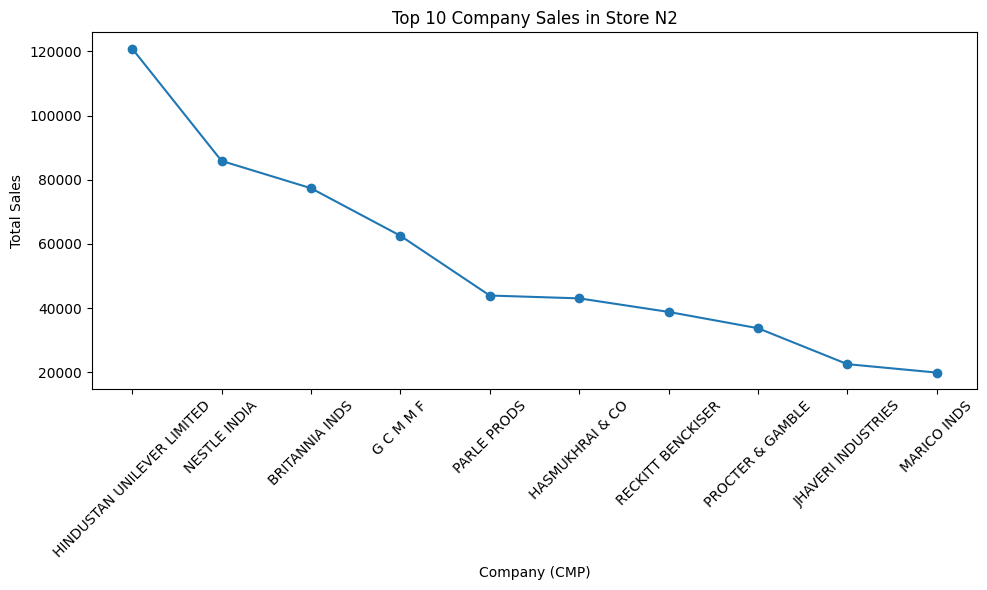

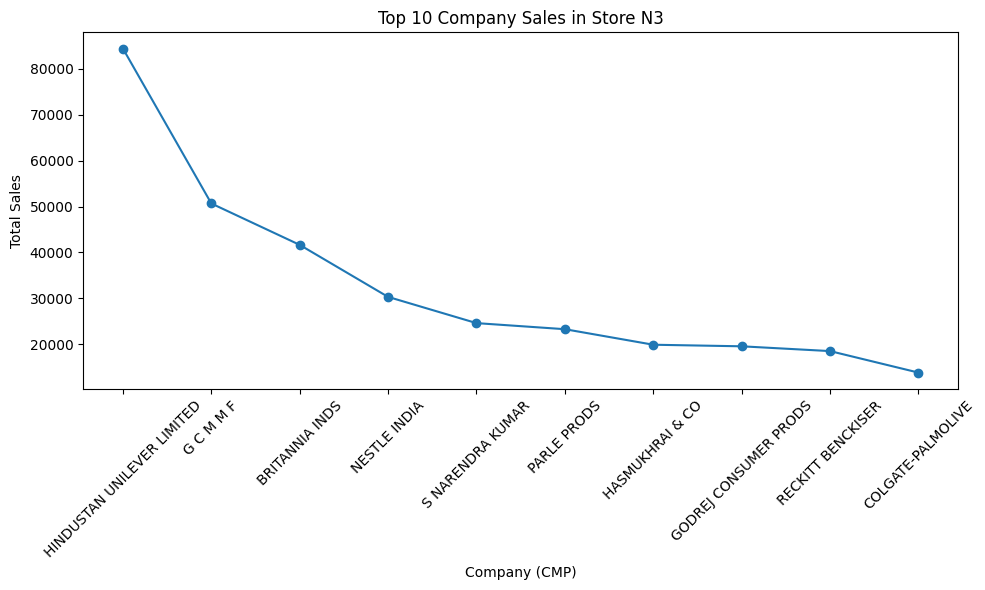

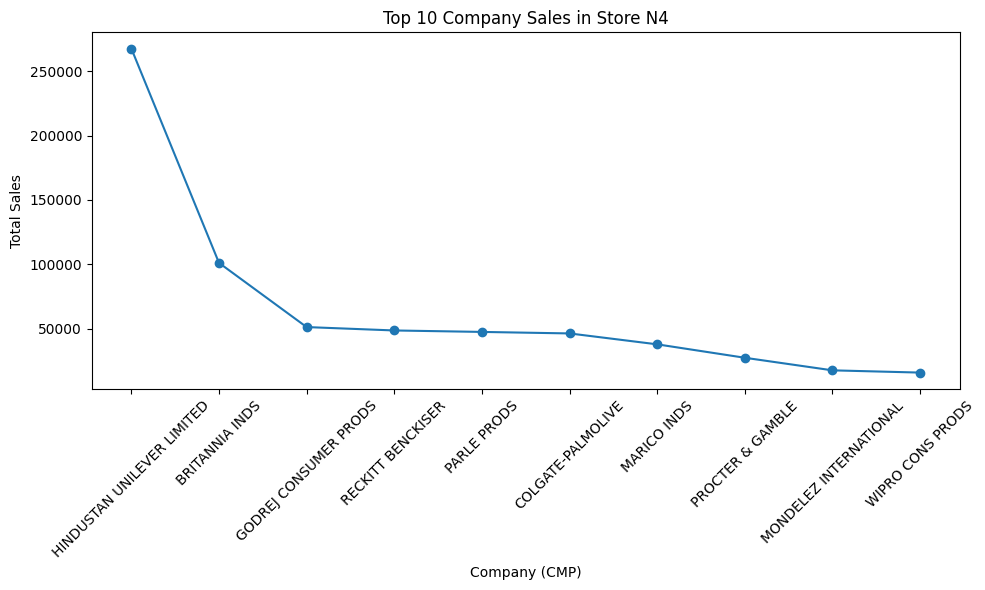

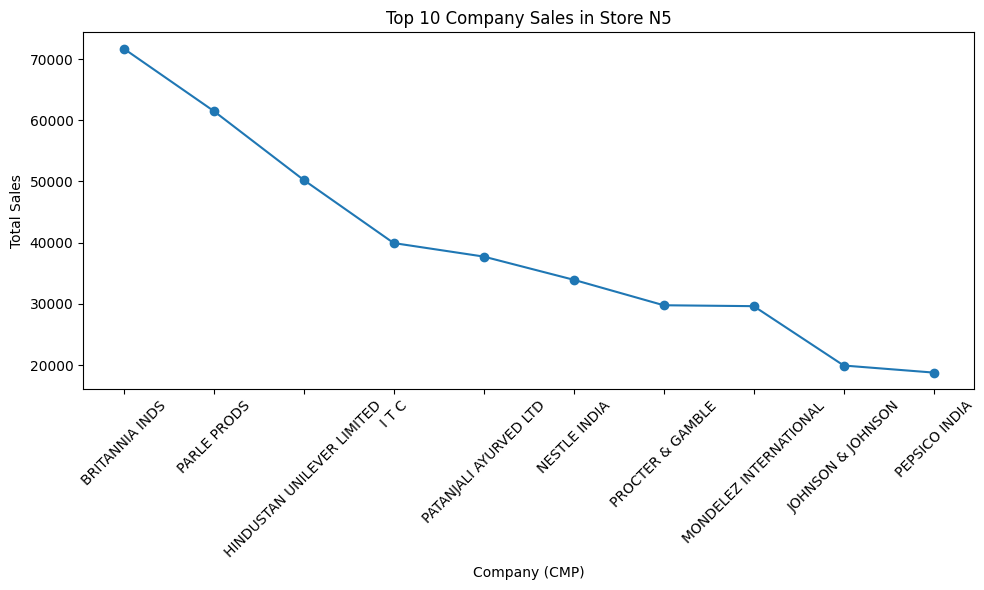

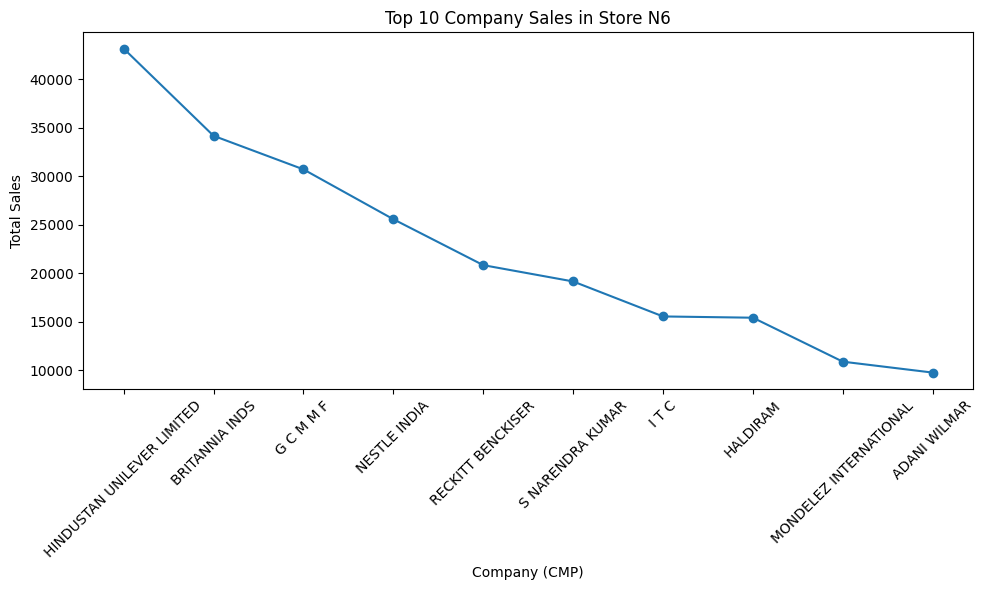

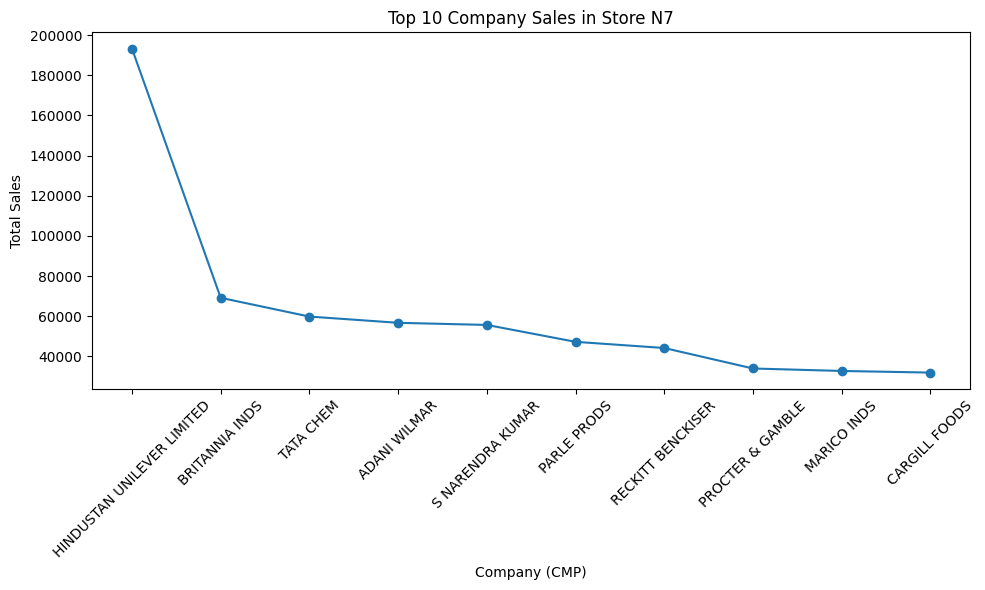

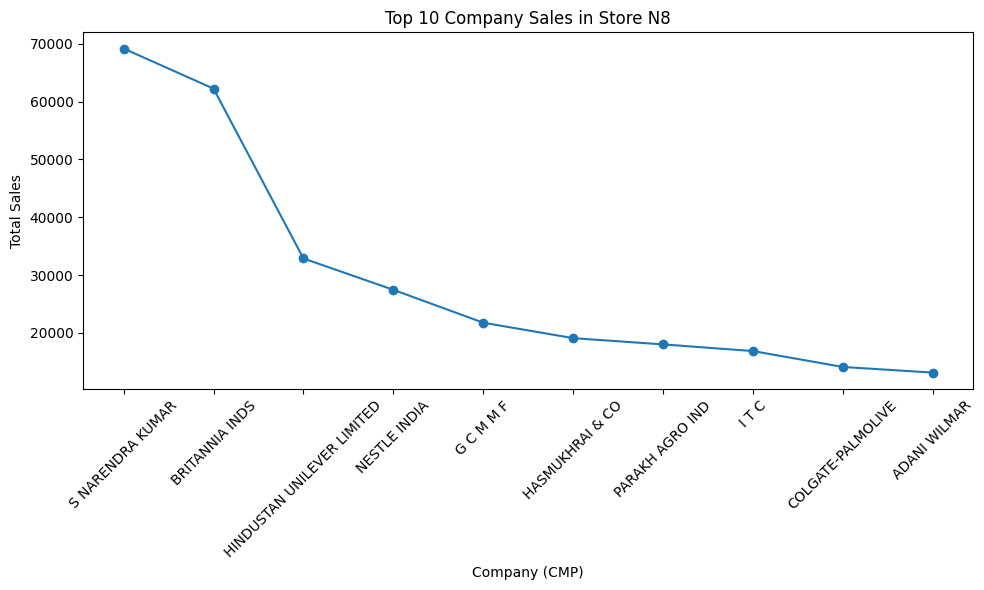

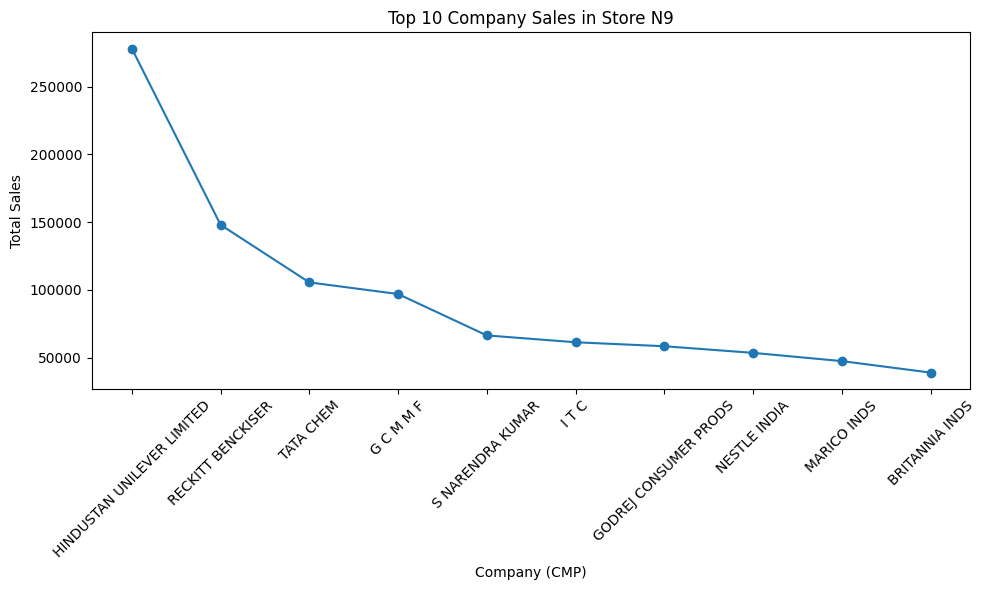

In [ ]:

sales_by_store_and_company = df.groupby(['STORECODE', 'CMP'])['BILL_AMT'].sum().reset_index()
sales_by_store_and_company_sorted = sales_by_store_and_company.sort_values(by=['STORECODE', 'BILL_AMT'], ascending=[True, False])
top_10_sales_by_store = sales_by_store_and_company_sorted.groupby('STORECODE').head(10)
for store_code, data in top_10_sales_by_store.groupby('STORECODE'):
    plt.figure(figsize=(10, 6))
    plt.plot(data['CMP'], data['BILL_AMT'], marker='o', linestyle='-', label=f'Store {store_code}')
    plt.title(f'Top 10 Company Sales in Store {store_code}')
    plt.xlabel('Company (CMP)')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.legend
    plt.tight_layout()
    plt.show()


COMPANY SALES MONTHLY

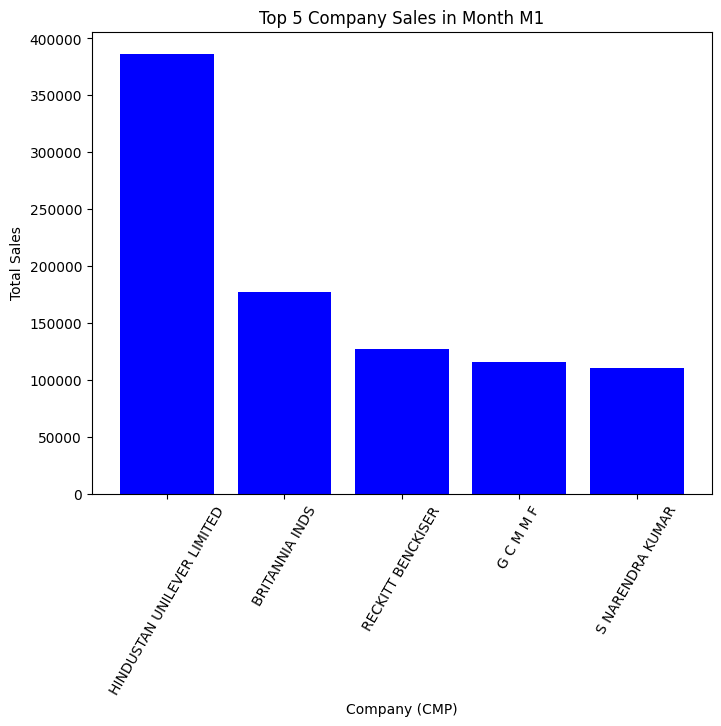

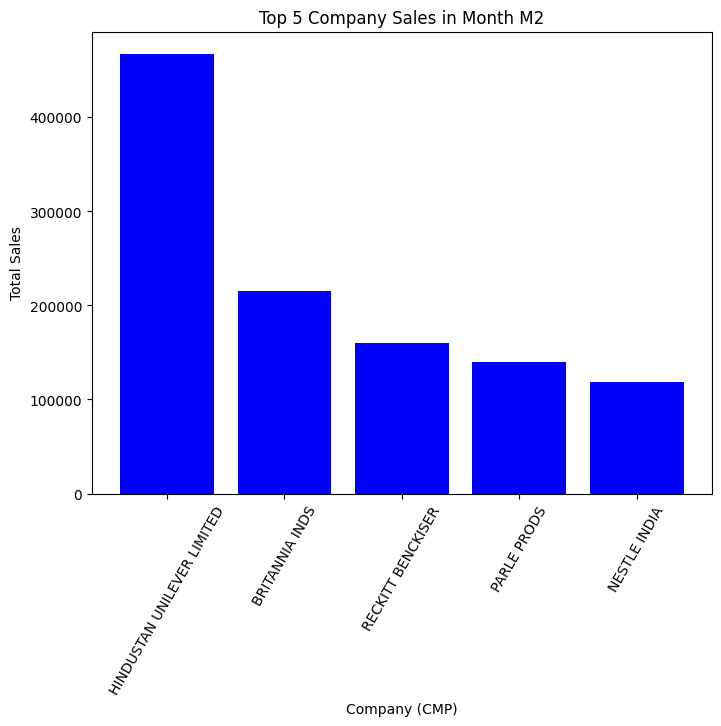

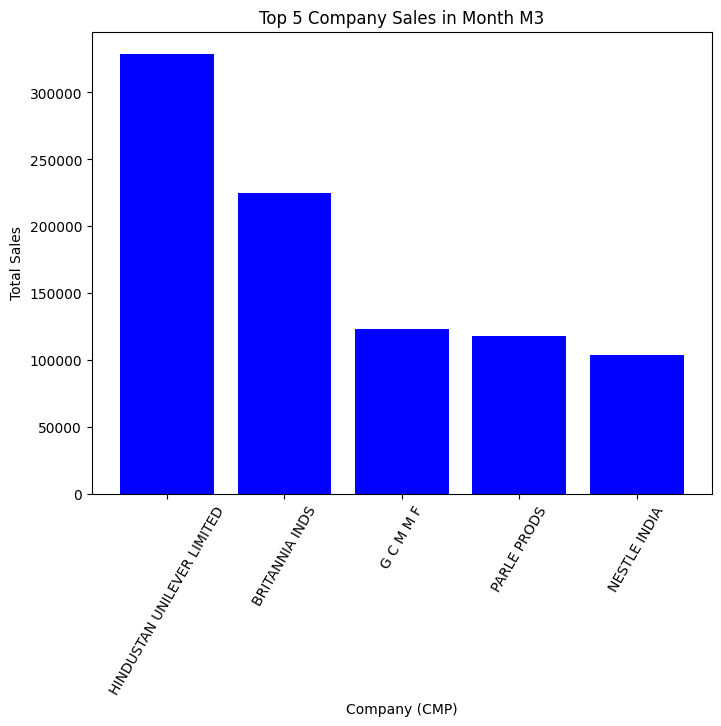

In [ ]:
sales_by_month_and_company = df.groupby(['MONTH', 'CMP'])['BILL_AMT'].sum().reset_index()
sales_by_month_and_company_sorted = sales_by_month_and_company.sort_values(by=['MONTH', 'BILL_AMT'], ascending=[True, False])
top_5_sales_by_month = sales_by_month_and_company_sorted.groupby('MONTH').head(5)
for month, data in top_5_sales_by_month.groupby('MONTH'):
    plt.figure(figsize=(8, 6))
    plt.bar(data['CMP'], data['BILL_AMT'], color='blue')
    plt.title(f'Top 5 Company Sales in Month {month}')
    plt.xlabel('Company (CMP)')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=60)
    plt.show()

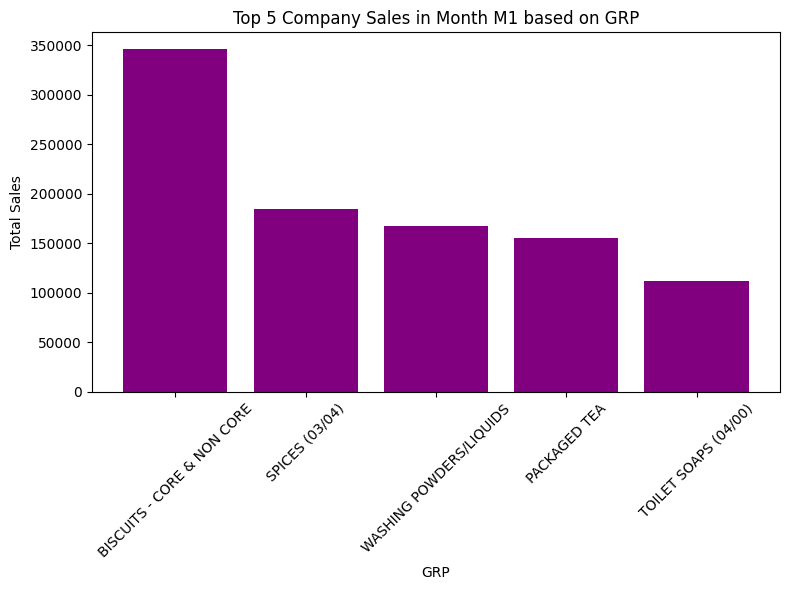

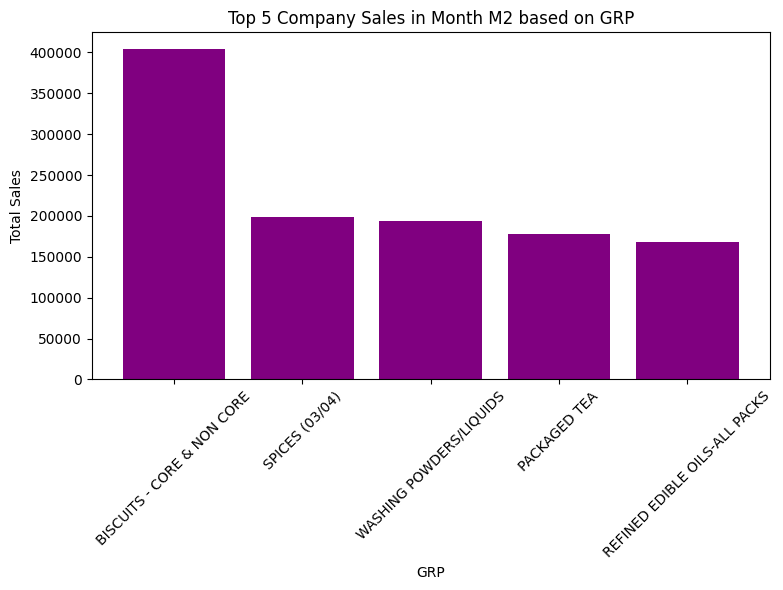

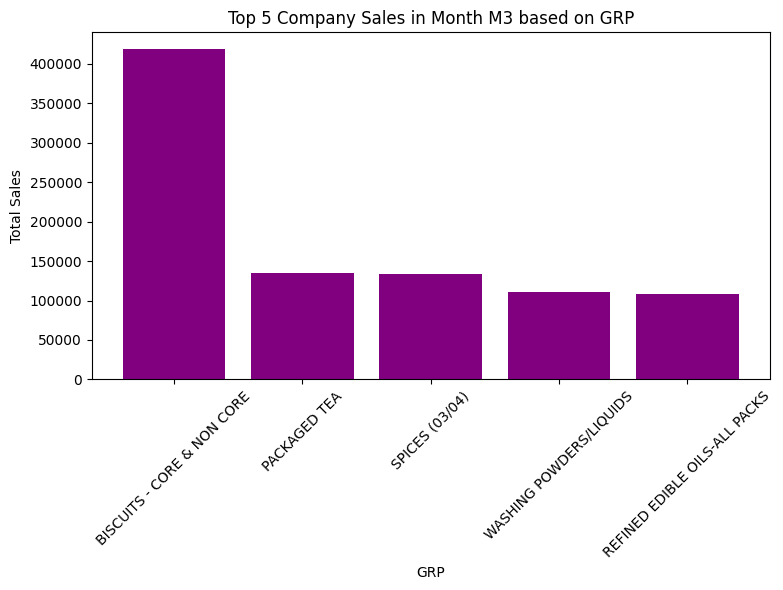

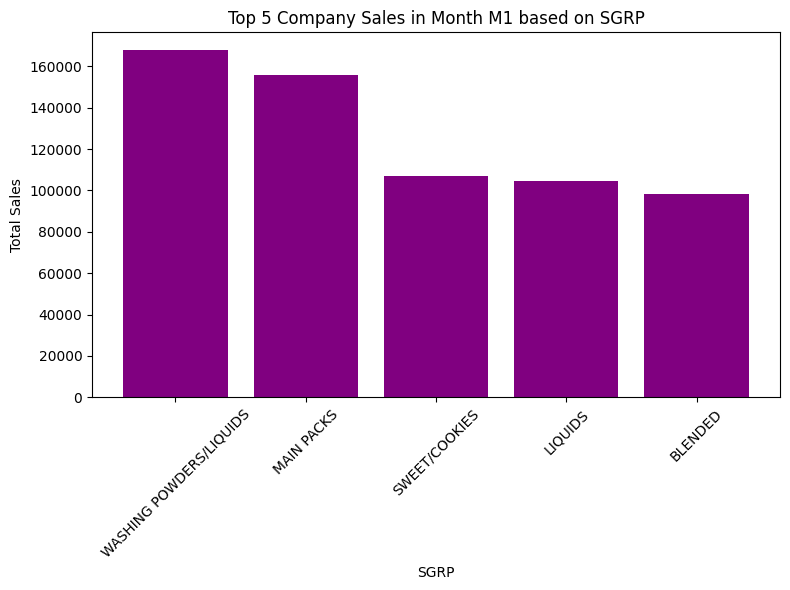

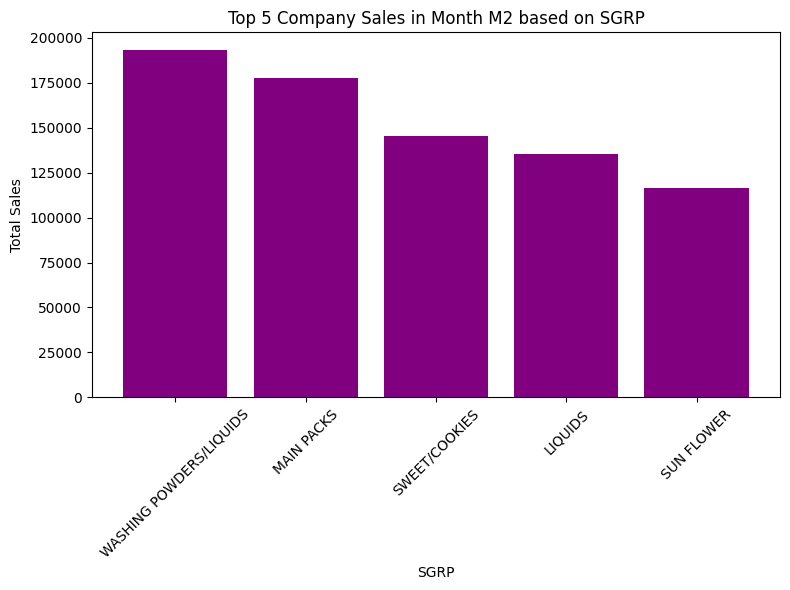

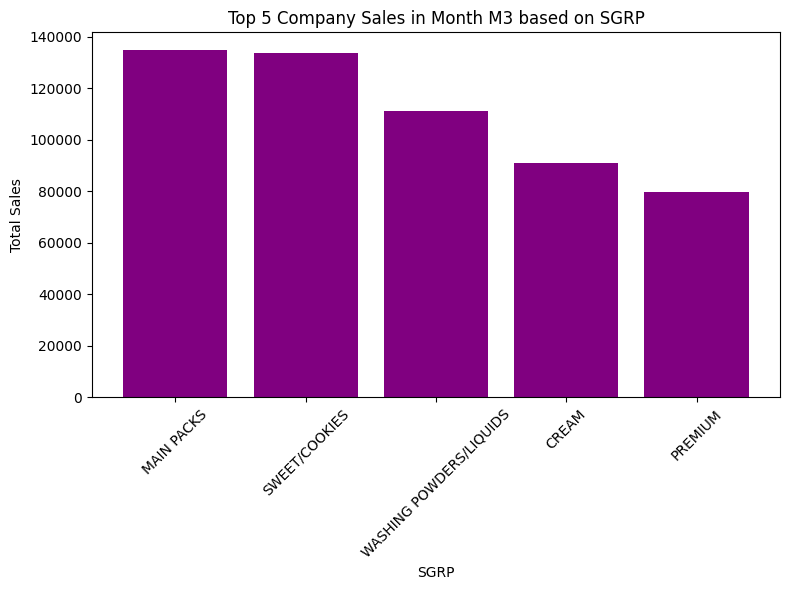

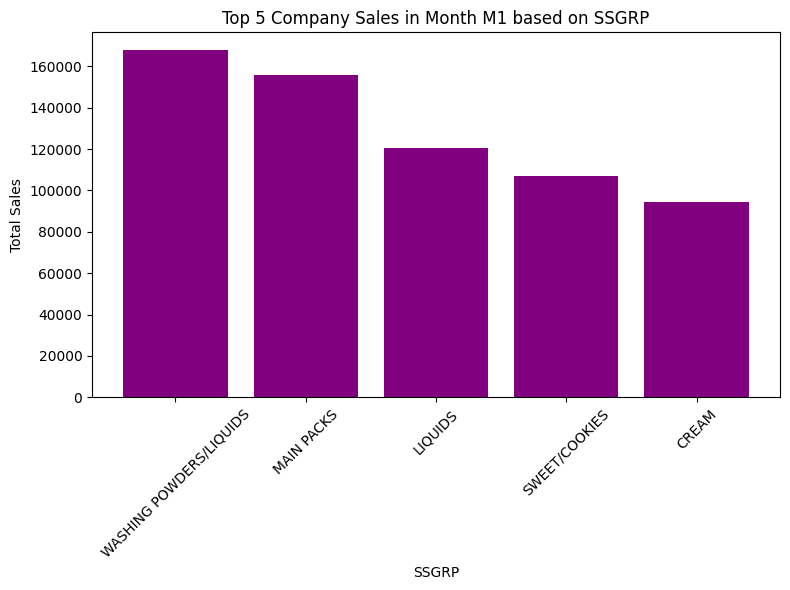

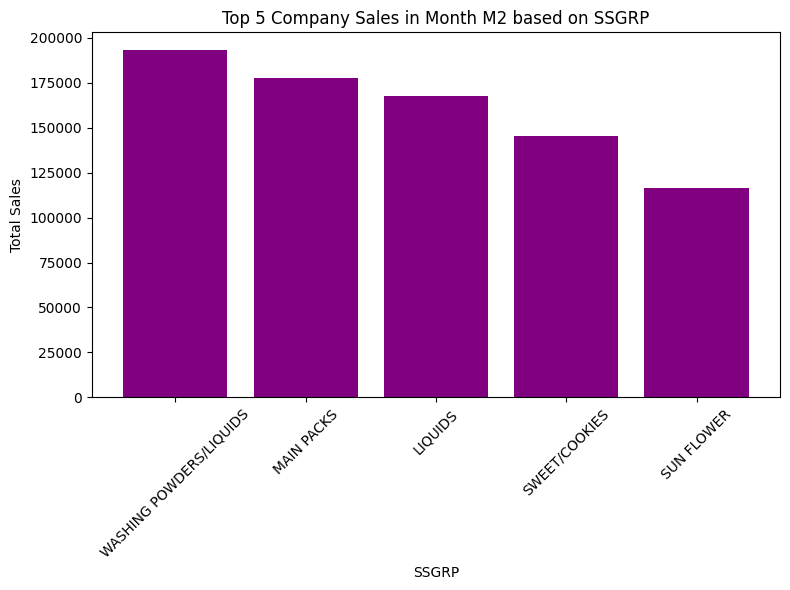

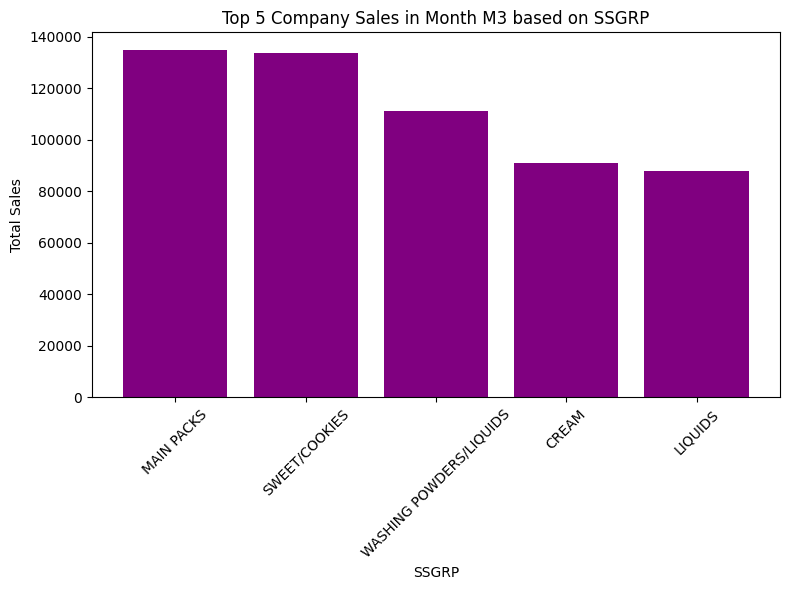

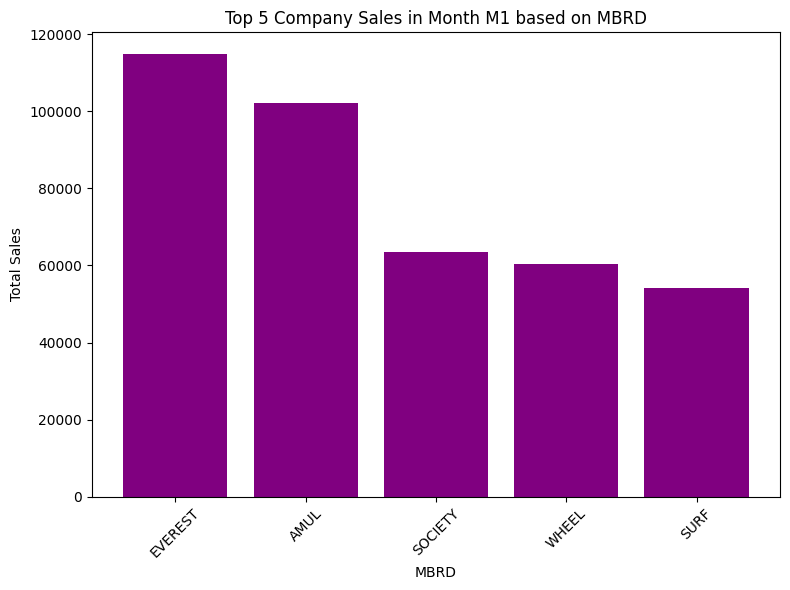

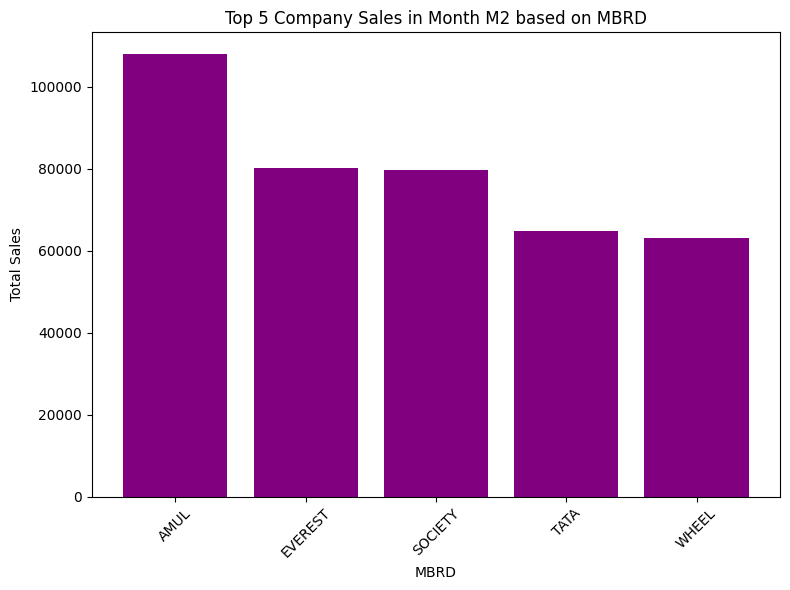

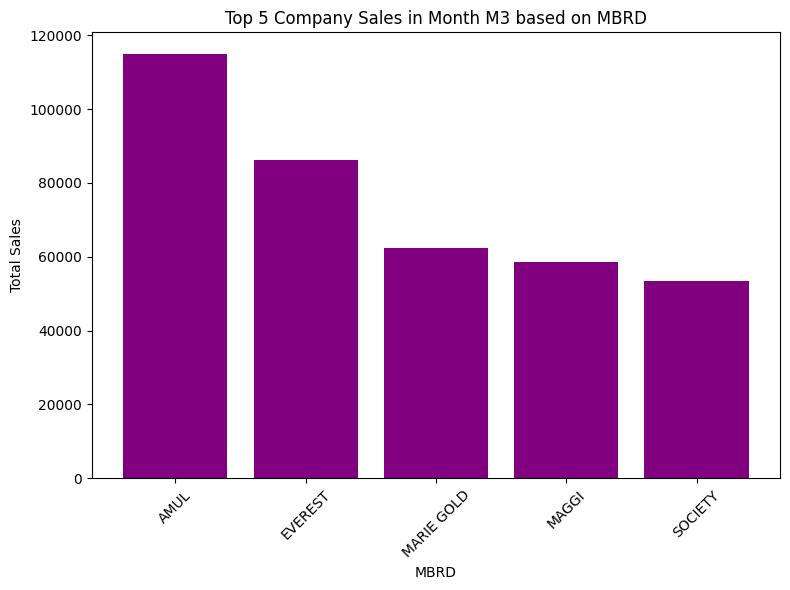

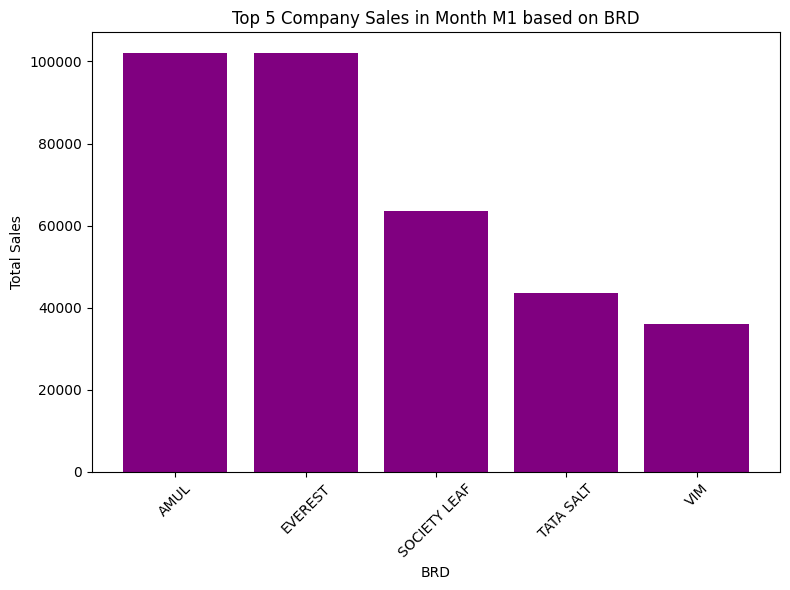

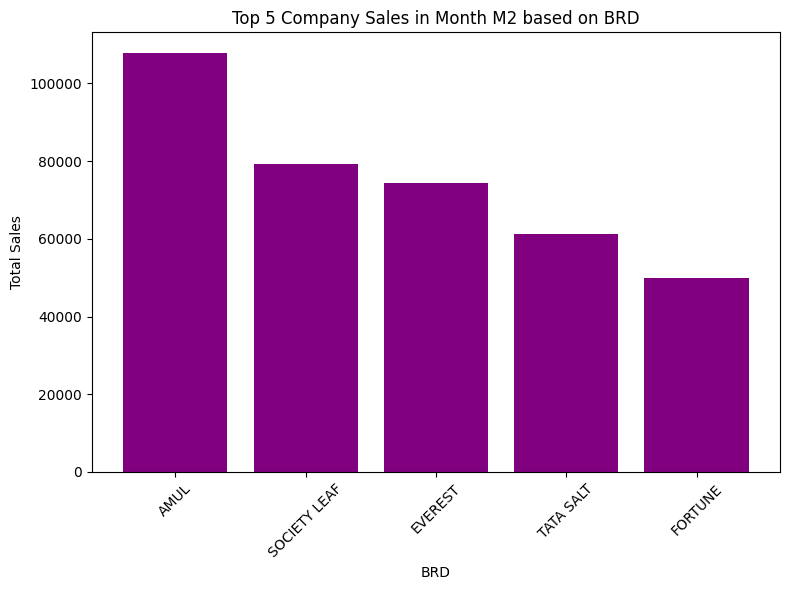

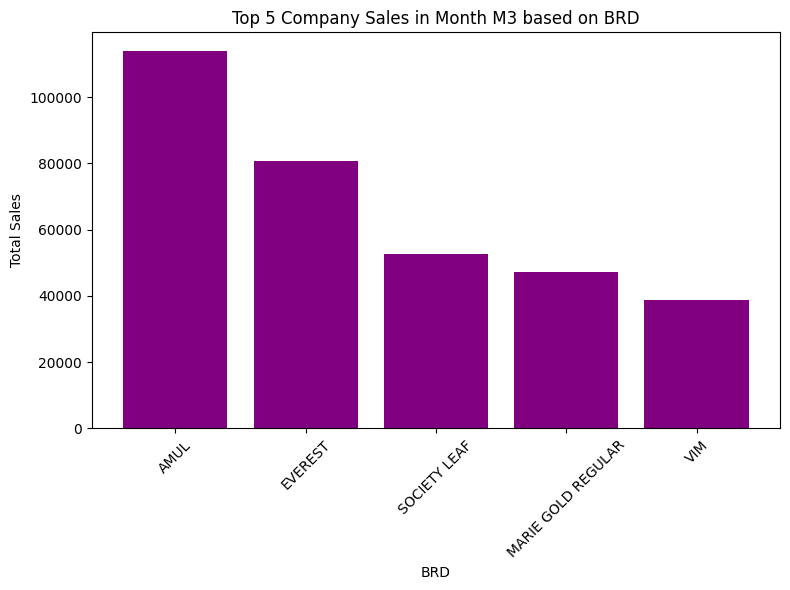

In [ ]:

categories = ['GRP', 'SGRP', 'SSGRP', 'MBRD', 'BRD']

for category in categories:
    sales_by_month_and_category = df.groupby(['MONTH', category])['BILL_AMT'].sum().reset_index()
    sales_by_month_and_category_sorted = sales_by_month_and_category.sort_values(by=['MONTH', 'BILL_AMT'], ascending=[True, False])
    top_5_sales_by_category = sales_by_month_and_category_sorted.groupby('MONTH').head(5)
    for month, data in top_5_sales_by_category.groupby('MONTH'):
        plt.figure(figsize=(8, 6))
        plt.bar(data[category], data['BILL_AMT'], color='purple')
        plt.title(f'Top 5 Company Sales in Month {month} based on {category}')
        plt.xlabel(f'{category}')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


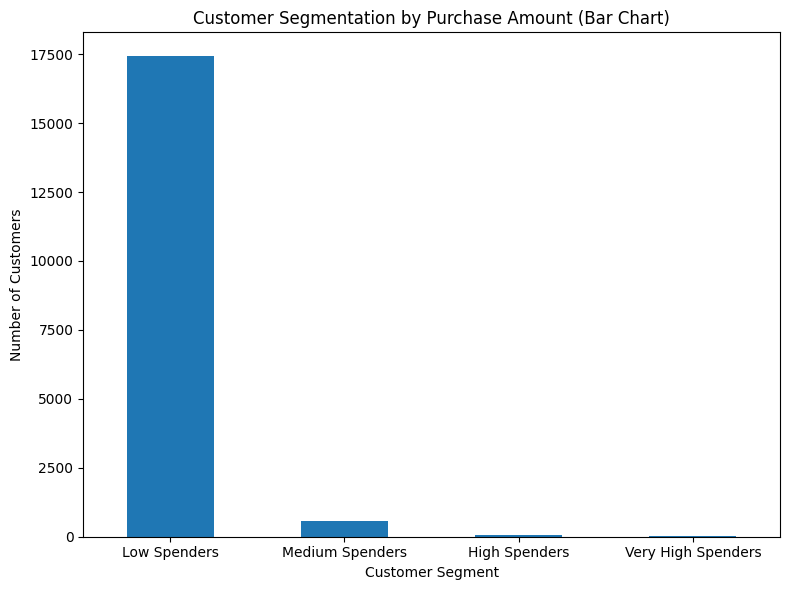

In [ ]:
bins = np.linspace(df['BILL_AMT'].min(), df['BILL_AMT'].max(), 5)
bin_labels = ['Low Spenders', 'Medium Spenders', 'High Spenders', 'Very High Spenders']
customer_segments = pd.cut(df['BILL_AMT'], bins=bins, labels=bin_labels)
customer_segment_counts = customer_segments.value_counts()
plt.figure(figsize=(8, 6))
customer_segment_counts.plot(kind='bar')
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation by Purchase Amount (Bar Chart)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()